# Ridge classifier with Normalization

This Code template is for the Classification tasks using RidgeClassifier and feature rescaling technique Normalization.

# Required Packages


In [21]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as se
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

# Initialization

Path for csv file

In [22]:
#filepath
file_path= "/Users/prajwalite/Downloads/Placement_Data_Full_Class.csv"

In [23]:
#x_values
features=['sl_no','gender','ssc_p','ssc_b','hsc_p','salary','hsc_s','degree_p','degree_t',
          'workex','etest_p','specialisation','mba_p','status']

In [24]:
#y_value
target='hsc_b'

# Data fetching
pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [25]:
#read_csv
df=pd.read_csv(file_path)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Feature Selections
We will assign all the required input features to X and target/outcome to Y.

In [26]:
#Get training and testing dataset 
X=df[features]
Y=df[target]

# Data Preprocessing
Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [27]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [28]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,sl_no,ssc_p,hsc_p,salary,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,270000.000000,58.00,55.0,58.80,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,200000.000000,77.48,86.5,66.28,0,1,1,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,250000.000000,64.00,75.0,57.80,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,288655.405405,52.00,66.0,59.43,0,1,1,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,425000.000000,73.30,96.8,55.50,0,1,1,...,0,1,0,0,1,0,1,0,0,1


# Correlation Map
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

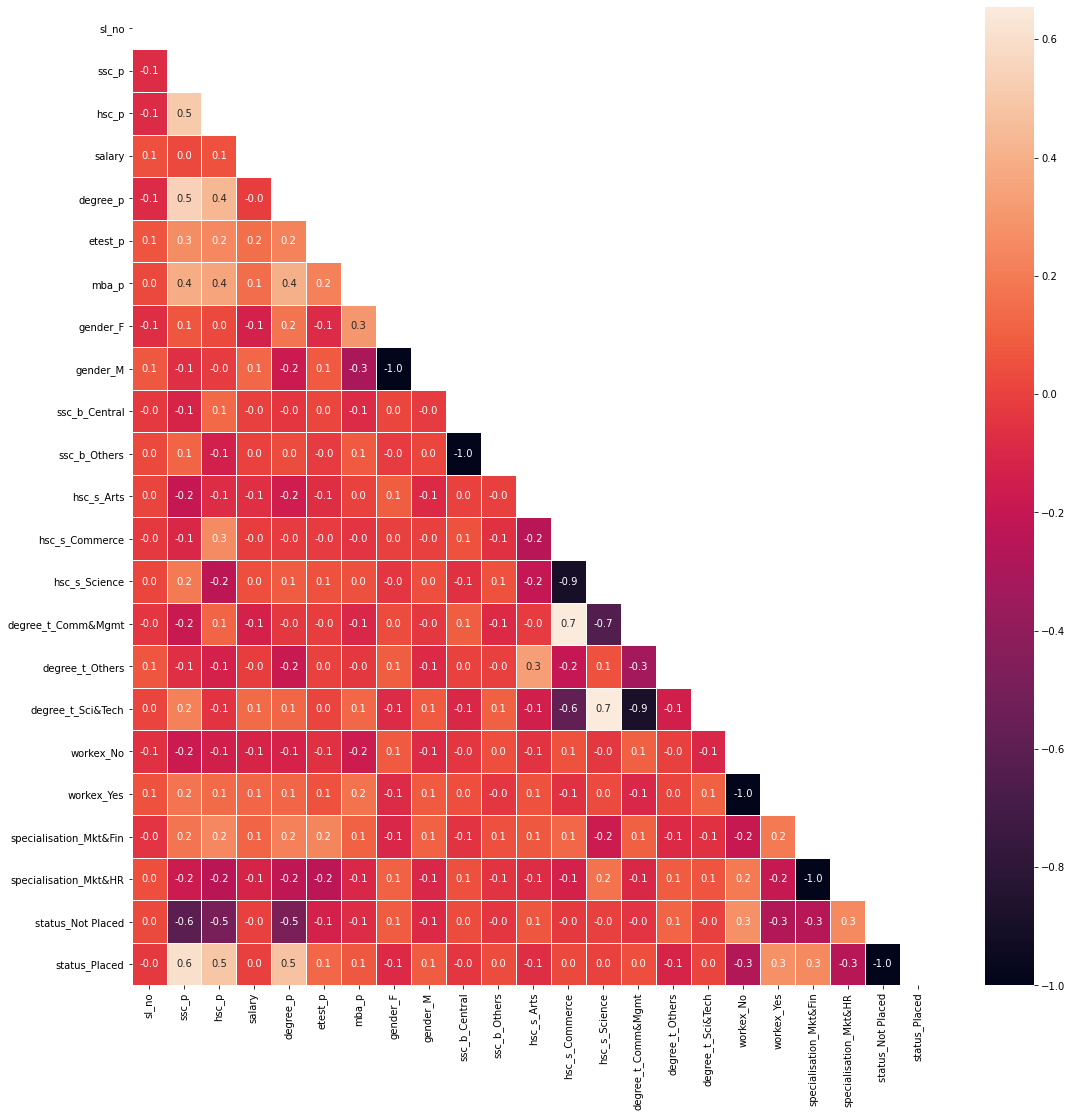

In [29]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

# Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=120)

## Normalize
Normalizer normalizes samples individually to unit norm where each sample (i.e. each row) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

We will fit an object of Normalizer to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

In [31]:
x_train = normalize(x_train)
x_test = normalize(x_test)

# Model
Classifier using Ridge regression.

This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).

### Model Tuning Parameters:

alpha -> Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

solver -> Solver to use in the computational routines {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

tol -> Precision of the solution.

In [32]:
model = RidgeClassifier(alpha=10 , random_state=123)
model.fit(x_train,y_train)

RidgeClassifier(alpha=10, random_state=123)

# Model Accuracy

In [33]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 56.92 %



## Confusion Matrix¶
A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known

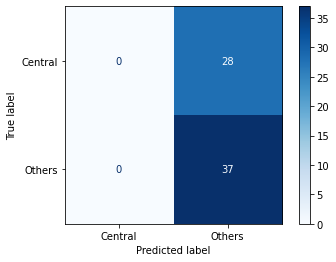

In [34]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
Precision:- Accuracy of positive predictions.

Recall:- Fraction of positives that were correctly identified.

f1-score:- percent of positive predictions were correct

support:- Support is the number of actual occurrences of the class in the specified dataset.

In [35]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

     Central       0.00      0.00      0.00        28
      Others       0.57      1.00      0.73        37

    accuracy                           0.57        65
   macro avg       0.28      0.50      0.36        65
weighted avg       0.32      0.57      0.41        65



# Creator - Prajwal Nimje, Github: [Profile](https://github.com/PrajwalNimje1997)